Data cleaning

In [105]:
import numpy as np
import pandas as pd
from IPython.display import display
import email

In [106]:
emails = pd.read_csv("emails.csv")
emails.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [107]:
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [108]:
emails['date'] = get_field("Date", emails['message'])
emails['subject'] = get_field("Subject", emails['message'])
emails['XFolder'] = get_field("X-Folder", emails['message'])
emails['X-From'] = get_field("X-From", emails['message'])
emails['X-To'] = get_field("X-To", emails['message'])
emails.head(3)

,file,message,date,subject,XFolder,X-From,X-To
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall


In [109]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

emails['body'] = body(emails['message'])
emails.head(3)

,file,message,date,subject,XFolder,X-From,X-To,body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!


In [110]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

emails['employee'] = employee(emails['file'])
emails.head(3)

,file,message,date,subject,XFolder,X-From,X-To,body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p


In [111]:
unique_emails=pd.DataFrame(emails['XFolder'].value_counts())
unique_emails.reset_index(inplace=True)
unique_emails.columns=['folder_name','count']
unique_emails.iloc[:20,:]

,folder_name,count
0,\Kay_Mann_June2001_1\Notes Folders\All documents,6639
1,\Tanya_Jones_Dec2000\Notes Folders\All documents,5934
2,\Jeff_Dasovich_June2001\Notes Folders\All docu...,5637
3,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,5211
4,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,5066
5,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,4956
6,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,4660
7,\Kay_Mann_June2001_3\Notes Folders\Sent,4440
8,\Kay_Mann_June2001_4\Notes Folders\'sent mail,4220
9,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,4022


In [112]:
import datetime
from dateutil import parser
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [113]:
def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

emails['date'] = change_type(emails['date'])
emails.head(2)

,file,message,date,subject,XFolder,X-From,X-To,body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,14-05-2001 16:39:00,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,04-05-2001 13:51:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p


In [114]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

emails['XFolder'] = preprocess_folder(emails['XFolder'])
#df.head(2)

In [115]:
unwanted_folders = ["all documents", "deleted items", "discussion threads", "sent", "deleted Items", "inbox",
                   "sent items", "'sent mail", "untitled", "notes inbox", "junk file", "calendar"]

# A new dataframe without non-topical folders
emails = emails.loc[~emails['XFolder'].isin(unwanted_folders)]
print(emails.iloc[:15]["XFolder"].value_counts())

straw                   8
2000 conference         3
contacts                2
avaya                   1
active international    1
Name: XFolder, dtype: int64


In [116]:
email_count = dict(emails["employee"].value_counts())
reduced_emails = [key for key, val in email_count.items() if val >= 2000]
emails = emails.loc[emails['employee'].isin(reduced_emails)]
print(emails["employee"].value_counts())

kean-s         5550
kaminski-v     4483
kitchen-l      4034
farmer-d       3786
williams-w3    2775
lokay-m        2554
taylor-m       2477
shapiro-r      2036
beck-s         2013
Name: employee, dtype: int64


In [117]:
def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

In [118]:
emails['subject'] = replace_empty_with_nan(emails['subject'])
emails['X-To'] = replace_empty_with_nan(emails['X-To'])

In [119]:
emails.dropna(axis=0, inplace=True)

In [120]:
emails.isnull().sum()

file        0
message     0
date        0
subject     0
XFolder     0
X-From      0
X-To        0
body        0
employee    0
dtype: int64

In [121]:
#cols_to_drop = ['file','message','date','X-From','X-To']

In [122]:
#emails.drop(cols_to_drop, axis=1, inplace=True)

Choose employee

In [123]:
employee = emails[emails["employee"] == "kaminski-v"]

In [124]:
def remove_folders(emails, n):
    # Returns the folders containing more than 'n' number of e-mails
    email_count = dict(emails["XFolder"].value_counts())
    small_folders = [key for key, val in email_count.items() if val <= n]
    emails = emails.loc[~emails['XFolder'].isin(small_folders)]
    return emails

In [125]:
n = 200
employee = remove_folders(employee, n)

Random Label

In [126]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(df):
    class_le = LabelEncoder()
    # apply label encoder on the `Folder` column
    y = class_le.fit_transform(df['XFolder'])
    df.loc[:,'label'] = y
    return df

In [127]:
label_encoder(employee) 

,file,message,date,subject,XFolder,X-From,X-To,body,employee,label
209658,kaminski-v/c/mangmt/ene_ect/100.,Message-ID: <6375330.1075856569526.JavaMail.ev...,19-12-2000 05:56:00,Re: 2001 PRELIMINARY I/C billing,ene_ect,Vince J Kaminski,Becky Pham,"Becky,\n\nThe charges to Corp. go to RAC and a...",kaminski-v,1
209659,kaminski-v/c/mangmt/ene_ect/101.,Message-ID: <10877336.1075856569549.JavaMail.e...,14-12-2000 06:19:00,Re: Jeff Skilling's presentation,ene_ect,Alhamd Alkhayat,"Vince J Kaminski, Rob Bradley, Maureen Raymond...",I want to thank all of you for all your help!\...,kaminski-v,1
209660,kaminski-v/c/mangmt/ene_ect/102.,Message-ID: <10856720.1075856569573.JavaMail.e...,12-12-2000 10:50:00,Improved Process for Engaging Temporary Workers,ene_ect,Enron Announcements,All Enron Employees United States,"As you are aware, Enron utilizes temporary sta...",kaminski-v,1
209661,kaminski-v/c/mangmt/ene_ect/103.,Message-ID: <33451330.1075856569649.JavaMail.e...,12-12-2000 03:29:00,December 15th Super Saturday FRIDAY Interview ...,ene_ect,Shelly Jones,"Art Bieser, Vince J Kaminski, Matthew Goering",Please see the attached regarding interview co...,kaminski-v,1
209662,kaminski-v/c/mangmt/ene_ect/104.,Message-ID: <12004340.1075856569671.JavaMail.e...,10-12-2000 22:07:00,eSource presents eSearch,ene_ect,Enron Announcements,All Enron Worldwide,eSource Launches eSearch Site Bringing Researc...,kaminski-v,1
...,...,...,...,...,...,...,...,...,...,...
227140,kaminski-v/universities/95.,Message-ID: <20226784.1075856633559.JavaMail.e...,02-02-2001 06:02:00,Draft from the editor with questions. I'll call,universities,Vince J Kaminski,Mark Palmer,"Mark,\n\nThis is the latest draft (Fri afterno...",kaminski-v,6
227141,kaminski-v/universities/96.,Message-ID: <11616920.1075856633580.JavaMail.e...,02-02-2001 02:59:00,Draft from the editor with questions. I'll call,universities,"""John D. Martin"" <J_Martin@baylor.edu>",vkamins@enron.com,"Vince,\n\nattached is the editor's latest edit...",kaminski-v,6
227142,kaminski-v/universities/97.,Message-ID: <25895982.1075856633602.JavaMail.e...,02-02-2001 01:01:00,The latest (last?),universities,Mark S Palmer,Mark Palmer,Intended for Mark A. Palmer....\n-------------...,kaminski-v,6
227143,kaminski-v/universities/98.,Message-ID: <32799241.1075856633624.JavaMail.e...,02-02-2001 00:55:00,Harvard Research Visit,universities,Melinda McCarty,Vince J Kaminski,Harvard Business School is doing a 5-year busi...,kaminski-v,6


In [128]:
cols_to_drop = ['file','message','date','X-From','X-To']

In [129]:
employee.drop(cols_to_drop, axis=1, inplace=True)

In [130]:
employee

,subject,XFolder,body,employee,label
209658,Re: 2001 PRELIMINARY I/C billing,ene_ect,"Becky,\n\nThe charges to Corp. go to RAC and a...",kaminski-v,1
209659,Re: Jeff Skilling's presentation,ene_ect,I want to thank all of you for all your help!\...,kaminski-v,1
209660,Improved Process for Engaging Temporary Workers,ene_ect,"As you are aware, Enron utilizes temporary sta...",kaminski-v,1
209661,December 15th Super Saturday FRIDAY Interview ...,ene_ect,Please see the attached regarding interview co...,kaminski-v,1
209662,eSource presents eSearch,ene_ect,eSource Launches eSearch Site Bringing Researc...,kaminski-v,1
...,...,...,...,...,...
227140,Draft from the editor with questions. I'll call,universities,"Mark,\n\nThis is the latest draft (Fri afterno...",kaminski-v,6
227141,Draft from the editor with questions. I'll call,universities,"Vince,\n\nattached is the editor's latest edit...",kaminski-v,6
227142,The latest (last?),universities,Intended for Mark A. Palmer....\n-------------...,kaminski-v,6
227143,Harvard Research Visit,universities,Harvard Business School is doing a 5-year busi...,kaminski-v,6


In [131]:
#employee['label'] = employee['XFolder'].factorize()[0]
category_id_df = employee[['XFolder','label']].drop_duplicates().sort_values('label')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['label', 'XFolder']].values)
employee.head()

,subject,XFolder,body,employee,label
209658,Re: 2001 PRELIMINARY I/C billing,ene_ect,"Becky,\n\nThe charges to Corp. go to RAC and a...",kaminski-v,1
209659,Re: Jeff Skilling's presentation,ene_ect,I want to thank all of you for all your help!\...,kaminski-v,1
209660,Improved Process for Engaging Temporary Workers,ene_ect,"As you are aware, Enron utilizes temporary sta...",kaminski-v,1
209661,December 15th Super Saturday FRIDAY Interview ...,ene_ect,Please see the attached regarding interview co...,kaminski-v,1
209662,eSource presents eSearch,ene_ect,eSource Launches eSearch Site Bringing Researc...,kaminski-v,1


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(employee.body).toarray()
labels = employee.label
features.shape

(2824, 15303)

In [133]:
features_chi2 = chi2(features, labels == 0)
indices = np.argsort(features_chi2[0])
feature_names = np.array(tfidf.get_feature_names())[indices]
unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
print(unigrams[-10:])

['speaker', 'registration', 'phelim', 'andreas', 'panel', 'cyprus', 'trigeorgis', 'lenos', 'garp', 'conference']


In [142]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'conferences':
  . Most correlated unigrams:
. garp
. conference
  . Most correlated bigrams:
. lenos trigeorgis
. garp 2001
# 'ene_ect':
  . Most correlated unigrams:
. chairman
. ena
  . Most correlated bigrams:
. join congratulating
. 20 enron
# 'management':
  . Most correlated unigrams:
. request
. moore
  . Most correlated bigrams:
. thanks kevin
. kevin moore
# 'personal':
  . Most correlated unigrams:
. promotion
. congratulations
  . Most correlated bigrams:
. congratulations deserved
. congratulations promotion
# 'projects':
  . Most correlated unigrams:
. curve
. model
  . Most correlated bigrams:
. close trading
. petronas com
# 'resumes':
  . Most correlated unigrams:
. resume
. interview
  . Most correlated bigrams:
. attached resume
. telephone interview
# 'universities':
  . Most correlated unigrams:
. baylor
. wharton
  . Most correlated bigrams:
. upenn edu
. baylor edu


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(employee['body'], employee['XFolder'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

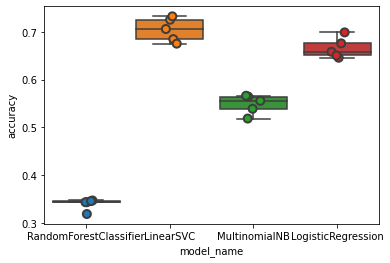

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [145]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.705018
LogisticRegression        0.666071
MultinomialNB             0.548863
RandomForestClassifier    0.339591
Name: accuracy, dtype: float64

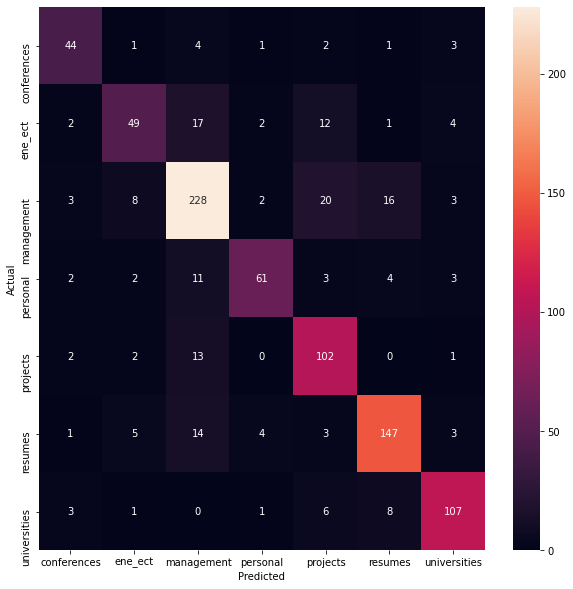

In [146]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, employee.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.XFolder.values, yticklabels=category_id_df.XFolder.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [147]:
from IPython.display import display
for predicted in category_id_df.label:
  for actual in category_id_df.label:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(employee.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['XFolder', 'body']])
      print('')

'ene_ect' predicted as 'management' : 17 examples.


,XFolder,body
209785,ene_ect,The memo distributed on June 27 on Reimburseme...
209850,ene_ect,"To Margaret and Beth,\n\nIn order to ensure a ..."
209929,ene_ect,Frank:\n\nI discussed this with Vince Kaminski...
209759,ene_ect,"ATTENTION! Starting 06/22/00, Enron IT Purcha..."
209908,ene_ect,"Vince,\n\nI left you a voice message that expl..."
209742,ene_ect,"Charlene, Karen:\n\nVince asked me to let you ..."
209888,ene_ect,"Jeff,\n\nThe newsletter is addressed to a wide..."
209862,ene_ect,Good morning Mary Sue:\n\nCan you please get t...
209721,ene_ect,Susan:\n\nVince would like to renew all of the...
209662,ene_ect,eSource Launches eSearch Site Bringing Researc...



'personal' predicted as 'management' : 11 examples.


,XFolder,body
220428,personal,"Dear Ms.Feldman,\nPlease receive all my apolog..."
220405,personal,Good morning Professor Ordonez:\n\nVince and S...
220375,personal,Thank you so much for your thoughtfulness....T...
220372,personal,I wish you Wonderful Holidays and a \nHappy Ha...
220408,personal,"Vince,\n\nHappy Boss Day ! You have been a wo..."
220522,personal,"Vince,\n\nFYI, I ordered the Risk Management ..."
220565,personal,Thank you for your message. The credit card I ...
220374,personal,"Thank You, so very much for the Gift Basket, i..."
220520,personal,"Vince, \n\nMy schedule for the RISK 2001 confe..."
220508,personal,"\nVince, \nMy schedule for the RISK 2001 confe..."



'projects' predicted as 'management' : 13 examples.


,XFolder,body
211116,projects,Vince: Apparently Neil McGregor became upset ...
210767,projects,"Steve,\n\nThanks a lot. I think that having th..."
211120,projects,"Sorry everyone, I guess I am having my Monday ..."
210948,projects,Stinson:\n\nI don't think Chonawee can do much...
210910,projects,"Vince,\n\nBefore I contact the London staff ab..."
211084,projects,---------------------- Forwarded by Stinson Gi...
210963,projects,Vince:\n\nI plan to be in Houston on July 5-7....
210921,projects,Please. My only risk is potnetial embarrassme...
210896,projects,"FYI\n\n1-2 days is optimistic, but we have cor..."
210775,projects,P.S. http://enaresearch.dev.corp.enron.com\n--...



'resumes' predicted as 'management' : 14 examples.


,XFolder,body
221109,resumes,"We'll get this offer out today, Vince.\n\nMoll..."
221131,resumes,"Hi, Dr. Kaminski:\n\n Glad to get your repl..."
221207,resumes,Vince -\n\nI work in the Caribbean Structuring...
221217,resumes,Dear Elizabeth:\n We interviewed Allen last we...
220771,resumes,"We'll get this offer out today, Vince.\n\nMoll..."
221158,resumes,"Thanks for your help, Vince.\n\nMolly\n\n\n\n\..."
221062,resumes,Feel free to circulate this to get a statistic...
220871,resumes,"Vincent,\n\nI have forwarded the resume to our..."
221214,resumes,"Celeste,\n\nI was under the impression I sent ..."
220896,resumes,"Hi,\n\n Thanks for taking time out of your..."



'ene_ect' predicted as 'projects' : 12 examples.


,XFolder,body
209736,ene_ect,Vince - I need these numbers by tomorrow AM as...
209793,ene_ect,Dear Vince: I just wanted to thank you for su...
209866,ene_ect,"Mark,\n\nI agree with you. They do not seem to..."
209695,ene_ect,"Shelly,\n\nThese are the Super Saturdays I can..."
209853,ene_ect,For those of you who did not see the memos fro...
209772,ene_ect,"Jeff,\n\nThe meeting is scheduled for Wednes..."
209867,ene_ect,You are scheduled to attend the EnronAnywhere ...
209735,ene_ect,"Chris,\n\nThe first file might have gone to a ..."
209928,ene_ect,I'll set him up on an interview schedule. Tha...
209924,ene_ect,Vince -\n\nHere's a summary of what's going to...



'management' predicted as 'projects' : 20 examples.


,XFolder,body
209966,management,"Hi Vince, \n Yannis of the Weather desk is ..."
210030,management,"Sam, \n\nYes, let's omit the guys who left the..."
210232,management,"Hi Vince,\n\n I have communicated the followin..."
210743,management,"Steve,\n\nPlease, let me know when you come b..."
210029,management,"Thank you, Vince. I really like your idea. \nT..."
210257,management,"Dear all,\n\nI will be in the Houston office f..."
210547,management,"Alex,\n\nI agree. Let them make up the data. P..."
210160,management,"Hi Vince,\nI have been working on and/or plann..."
210741,management,"Debbie,\n\nThis is an update on the continuing..."
210243,management,Vasant-\n\nI hope you had a wonderful vacation...



'management' predicted as 'resumes' : 16 examples.


,XFolder,body
209953,management,The Research Group is a unique and extraordin...
210742,management,....see you there...\n\nSteve\n\n -----Origina...
210205,management,"Hi,\n\nI'd like to thank you for the opportuni..."
210454,management,"Vince,\n\nA quick update on job candidates:\n\..."
210237,management,Vince:\n\nThey are already asking for evaluati...
210248,management,"Sheila,\n\nI am attaching the list of people ..."
210317,management,"Dear Vince,\n\nThank you for your prompt respo..."
210046,management,I will be out next week. If there are any pro...
210367,management,"Dr. Kaminski,\nI can stop by any Thursday or F..."
210371,management,In case you have not already heard through the...


In [148]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'conferences':
  . Top unigrams:
       . conference
       . register
  . Top bigrams:
       . real options
       . fyi vince
# 'ene_ect':
  . Top unigrams:
       . ena
       . shelly
  . Top bigrams:
       . friday december
       . 2000 08
# 'management':
  . Top unigrams:
       . norma
       . moore
  . Top bigrams:
       . kevin moore
       . thanks kevin
# 'personal':
  . Top unigrams:
       . congratulations
       . promotion
  . Top bigrams:
       . congratulations deserved
       . dear friends
# 'projects':
  . Top unigrams:
       . meeting
       . curve
  . Top bigrams:
       . meeting held
       . margaret carson
# 'resumes':
  . Top unigrams:
       . resume
       . interview
  . Top bigrams:
       . dr kaminski
       . ziplip com
# 'universities':
  . Top unigrams:
       . wharton
       . christie
  . Top bigrams:
       . thanks christie
       . meeting wharton


In [149]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=employee['XFolder'].unique()))

              precision    recall  f1-score   support

     ene_ect       0.77      0.79      0.78        56
  management       0.72      0.56      0.63        87
    projects       0.79      0.81      0.80       280
 conferences       0.86      0.71      0.78        86
    personal       0.69      0.85      0.76       120
     resumes       0.83      0.83      0.83       177
universities       0.86      0.85      0.86       126

    accuracy                           0.79       932
   macro avg       0.79      0.77      0.78       932
weighted avg       0.79      0.79      0.79       932

